# Importing the dependencies

In [128]:
! pip install plotly

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.4 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.7/16.4 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/16.4 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/16.4 MB 5.9 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.4 MB 5.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.4 MB 5.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.4 MB 5.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.4 MB 4.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/16.4 MB 4.7 MB/s eta 0:00:04
   ---- ----------------------------------- 2.0/16.4 MB 4.6 MB/s eta 0:00:04
   ----- ---------------------------------- 2.2/16.4 MB 4.5 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.4 MB 4.6 MB/s eta 0:00:04
   ---

In [6]:
! pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.2/10.9 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.9 MB 7.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.9 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/10.9 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 5.8 MB/s eta 0:00:02
   ---- ----------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
! pip install seaborn 

In [88]:
! pip install --upgrade pip

In [80]:
! pip install scipy

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Data Collection & Analysis

In [57]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv(r'C:\Users\missf\Downloads\Mall_Customers.csv',encoding= 'unicode_escape')

print('There are {} rows and {} columns'.format(customer_data.shape[0],customer_data.shape[1]))

There are 201 rows and 5 columns


In [58]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# finding the number of rows and columns
customer_data.shape

(201, 5)

In [60]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              201 non-null    int64 
 1   Gender                  201 non-null    object
 2   Age                     201 non-null    int64 
 3   Annual Income (k$)      201 non-null    int64 
 4   Spending Score (1-100)  201 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.0+ KB


In [61]:
# checking description of values
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,201.000000,201.000000,201.000000,201.000000
mean,101.000000,38.776119,60.771144,50.154229
std,58.167861,13.973354,26.369440,25.767054
min,1.000000,18.000000,15.000000,1.000000
25%,51.000000,28.000000,42.000000,35.000000
50%,101.000000,36.000000,62.000000,50.000000
75%,151.000000,49.000000,78.000000,73.000000
max,201.000000,70.000000,137.000000,99.000000


In [62]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory Data Analysis

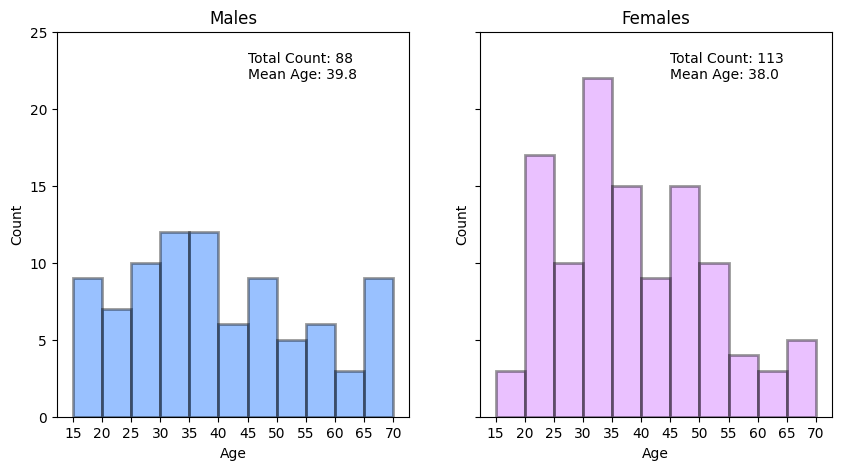

In [63]:
# gender evaluation 

males_age=customer_data[customer_data['Gender']=='Male']['Age'] #subset with males age
females_age=customer_data[customer_data['Gender']=='Female']['Age'] #subset with females age

age_bins=range(15,75,5)

# Males Histogram

fig2, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), sharey= True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "Total Count: {}".format(males_age.count()))
ax1.text(45,22, "Mean Age: {:.1f}".format(males_age.mean()))

# Females Histogram

sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_ylim(top=25)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "Total Count: {}".format(females_age.count()))
ax2.text(45,22, "Mean Age: {:.1f}".format(females_age.mean()))

plt.show()


In [64]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age,females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.47


*The average age of male customers is slightly higher than female ones(39.8 versus 38.0). The distribution of male age is more uniform than 
females, where we can observe that the biggest group is 30-35 years old.The Kolgomorov-smirnov test shows that the differences between
these two groups are statistically insignificant.*

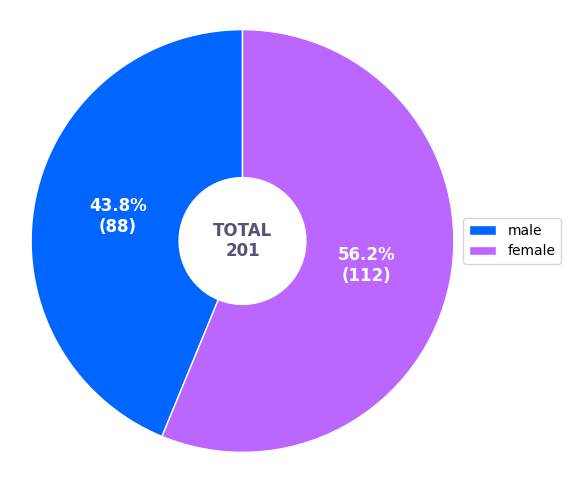

In [65]:
def labeler(pct,allvals):
     absolute = int(pct/100.*np.sum(allvals))
     return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] #wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#bb66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))
ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(customer_data['Age'].count()),
         weight='bold' ,size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal') # Equal aspect ratio
plt.show()
           

*There are slightly more female customers than male ones (112 vs 88) .Females are 56.2% of total customers*

Text(85, 17, 'Std. Deviation: 26.2k$')

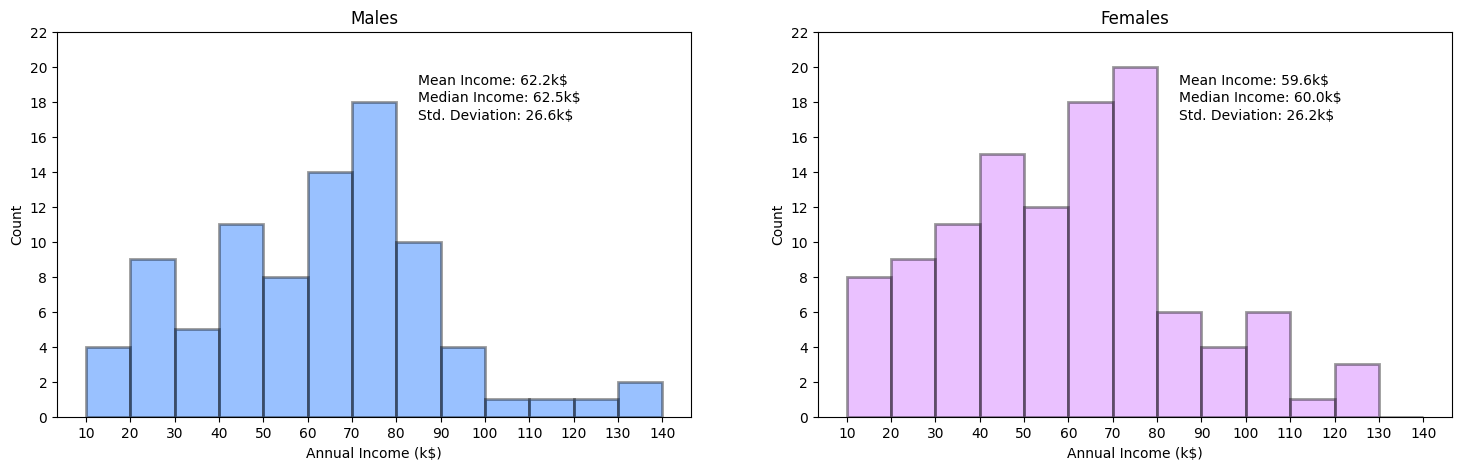

In [66]:
males_income=customer_data[customer_data['Gender']=='Male']['Annual Income (k$)'] #subset with males income
females_income=customer_data[customer_data['Gender']=='Female']['Annual Income (k$)'] #subset with females income

my_bins=range(10,150,10)

# Males Histogram

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean Income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median Income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. Deviation: {:.1f}k$".format(males_income.std()))

# Females Histogram

sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean Income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median Income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. Deviation: {:.1f}k$".format(females_income.std()))




In [67]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income,females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.84


*Mean income of males is higher than females (62.2 k$  vs  59.6 k$). Also, the median income of male customers(62.5  k$) 
is higher than female ones (60.0  k$). Similarly Std. deviation is also different and is higher for males.*

Text(50, 13, 'Std. Deviation: 24.0')

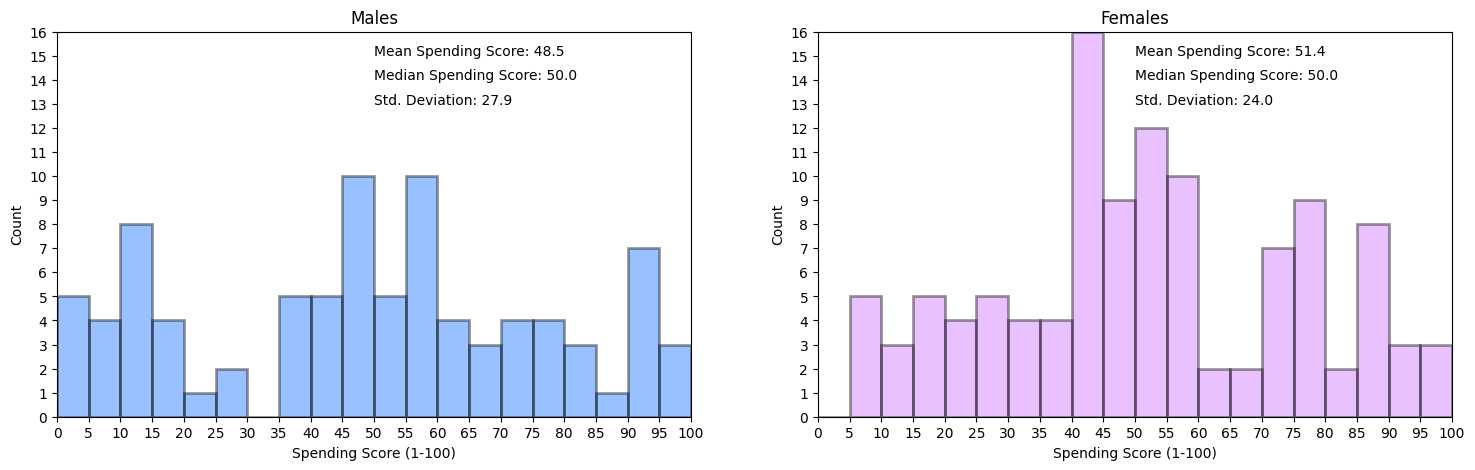

In [68]:
males_spending=customer_data[customer_data['Gender']=='Male']['Spending Score (1-100)'] #subset with males spending
females_spending=customer_data[customer_data['Gender']=='Female']['Spending Score (1-100)'] #subset with females spending

spending_bins=range(0,105,5)

# Males Histogram

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean Spending Score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median Spending Score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. Deviation: {:.1f}".format(males_spending.std()))

# Females Histogram

sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean Spending Score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median Spending Score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. Deviation: {:.1f}".format(females_spending.std()))



In [69]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending,females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.28


*Mean spending score of females(51.4) is higher than males (48.5).The K-S test p-value indicates that there is no evidence to reject the 
null-hypothesis. However the evidence is not so strong as in previous comparisons. Next I will calculate median income for all age groups.*

In [70]:
medians_by_age_grp = customer_data.groupby(["Gender",pd.cut(customer_data['Age'],age_bins)]).median()
medians_by_age_grp.index = medians_by_age_grp.index.set_names(['Gender','Age_group'])
medians_by_age_grp.reset_index(inplace=True)

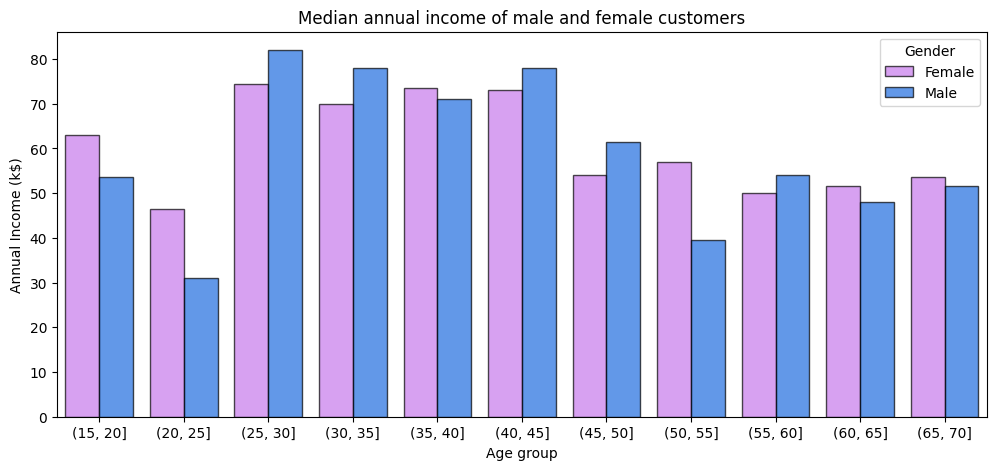

In [71]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_grp,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

# Correlations

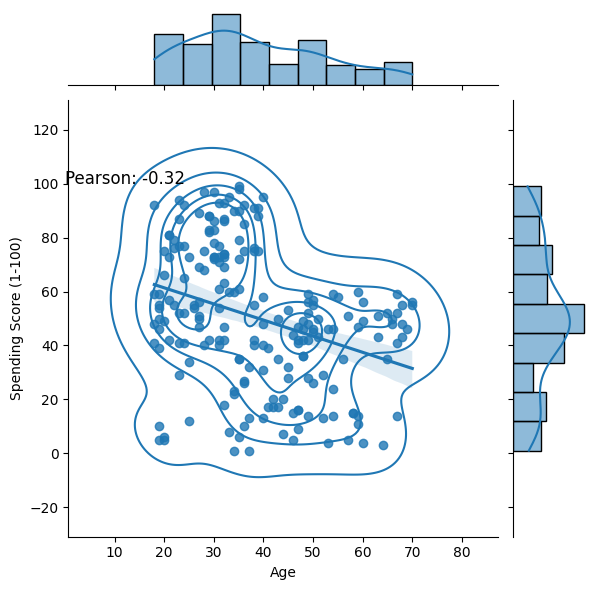

In [72]:
# Calculating Pearson's Correlation
corr, _ = pearsonr(customer_data['Age'], customer_data['Spending Score (1-100)'])
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=customer_data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0, 100, 'Pearson: {:.2f}'.format(corr), fontsize=12)

# Displaying the plot
plt.show()

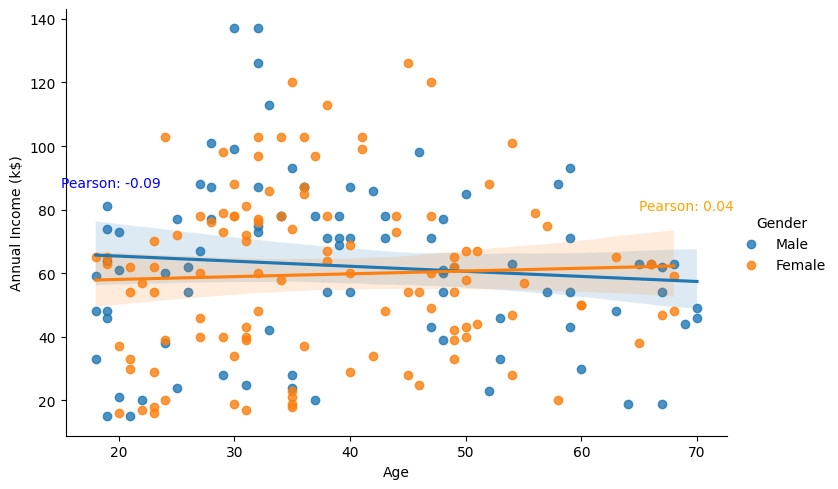

In [73]:
# Separate data by gender
males_age = customer_data[customer_data['Gender'] == 'Male']['Age']
males_income = customer_data[customer_data['Gender'] == 'Male']['Annual Income (k$)']
females_age = customer_data[customer_data['Gender'] == 'Female']['Age']
females_income = customer_data[customer_data['Gender'] == 'Female']['Annual Income (k$)']

# Calculating Pearson's Correlation
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', hue='Gender', data=customer_data, aspect=1.5)
plt.text(15, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()


*There is a negligible correlation b/w age and annual income of customers for both sex groups*

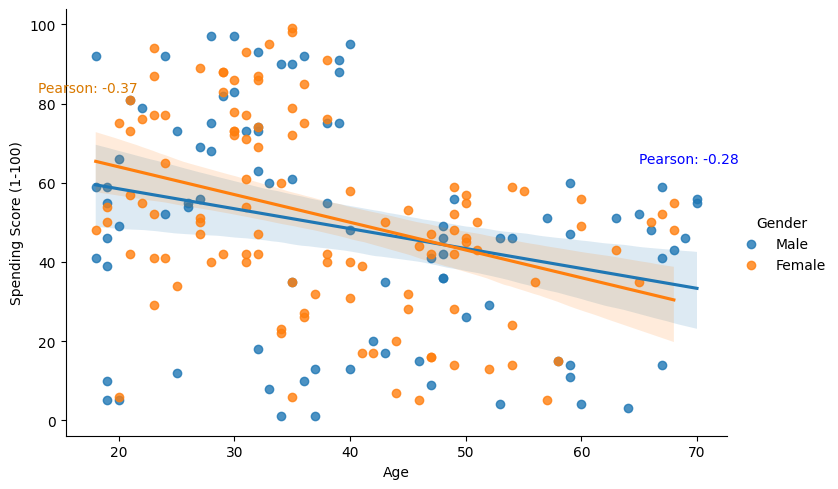

In [74]:
# Calculating Pearson's Correlation
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data = customer_data, hue='Gender',aspect=1.5)
plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

*There are week negative correlations (<0.5) b/w age and spending score for both sex groups*

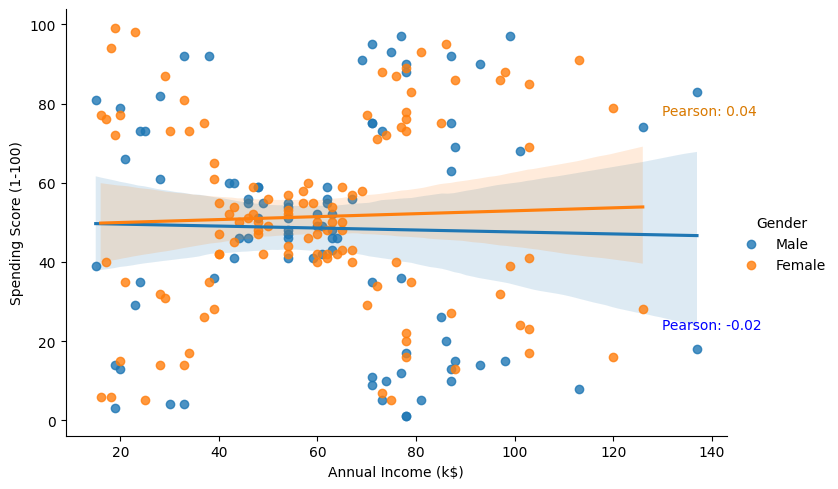

In [75]:
# Calculating Pearson's Correlation
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = customer_data, hue='Gender',aspect=1.5)
plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

*There is a negligible correlation annual income and spending score of customers for both sex groups*

*A bar chart above shows that the most wealthy customers are in age of 25-45 years old.The biggest difference b/w women and men is visible in 
age groups 25-30(male more rich) and 50-55(female more rich)*

# Clustering

### K-Means

In [38]:
from sklearn.cluster import KMeans

*For clustering only numeric columns are used*

*The graph above shows that there are some outliers-these points do not meet distance and minimum samples requirements to be recognised as a cluster*

In [23]:
X_numerics =customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

*In order to find an appropriate no. of clusters, the elbow method will be used. In this method for this case, the inertia for a no. of clusters b/w 2 
and 10 will be calculated. The rule is to choose the no. of clusters where you see a kink or "an elbow" in the graph*

In [37]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # no. of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette score

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for silhouette score method

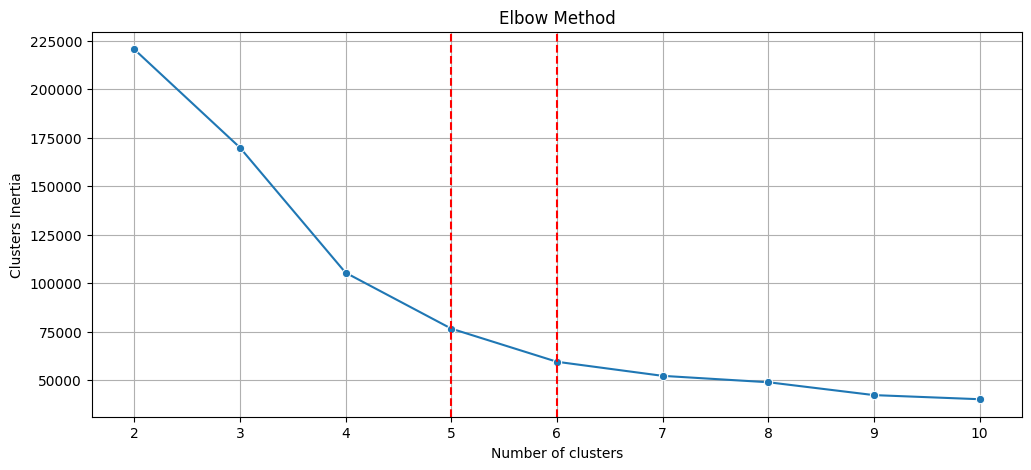

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Clusters Inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
ax.grid(True)
plt.show()

*There is no clear "elbow" visible.A choice of 5 or 6 clusters seems to be fair.Now we should see the silhouette score*

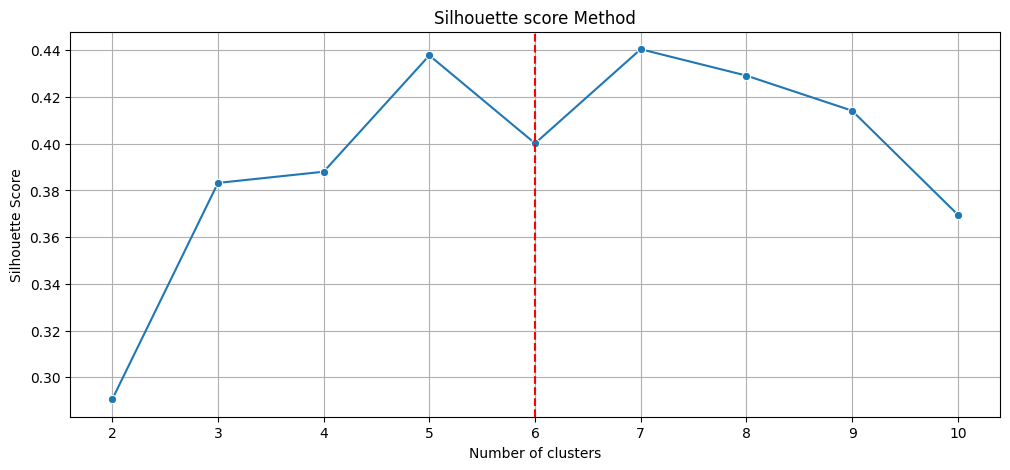

In [82]:
fig, ax = plt.subplots(figsize=(12, 5))
ax=sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score Method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(6, ls="--", c="red")
ax.grid(True)
plt.show()

*Silhouette score method indicates the best options would be respectively 6 or 5 clusters.Now compare both*

## 5 CLUSTERS

In [88]:
from sklearn.cluster import KMeans
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)  # initialize and fit K-Means model
KMS_clustered = X_numerics.copy()
KMS_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_   # append labels to points

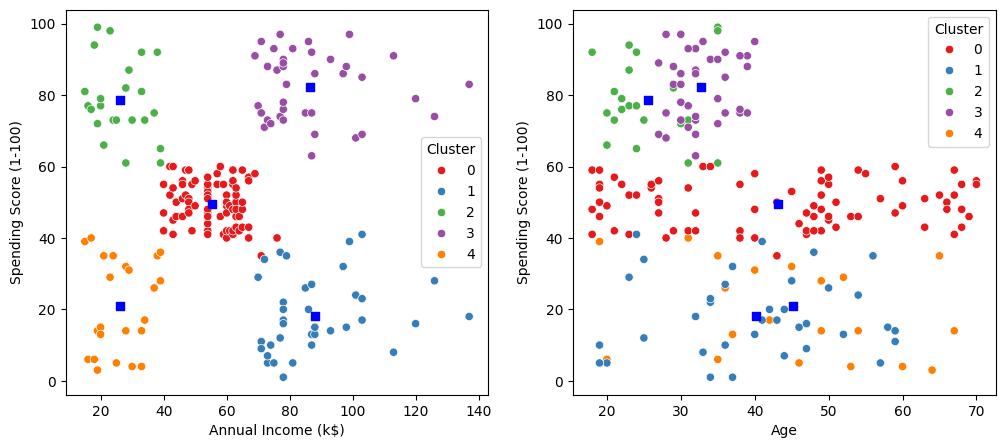

In [95]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KMS_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KMS_clustered,
                         hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 5 clusters:

- clients with low annual income and high spending score
- clients with medium annual income and medium spending score
- clients with high annual income and low spending score
- clients with high annual income and high spending score
- clients with low annual income and low spending score

There are no distinct groups is terms of customers age.

### Sizes of the clusters:

In [111]:
KMS_clust_sizes = KMS_clustered.groupby('Cluster').size().to_frame()
KMS_clust_sizes.columns = ["KMS_Size"]
KMS_clust_sizes

,KMS_Size
Cluster,
0,79
1,37
2,23
3,39
4,23


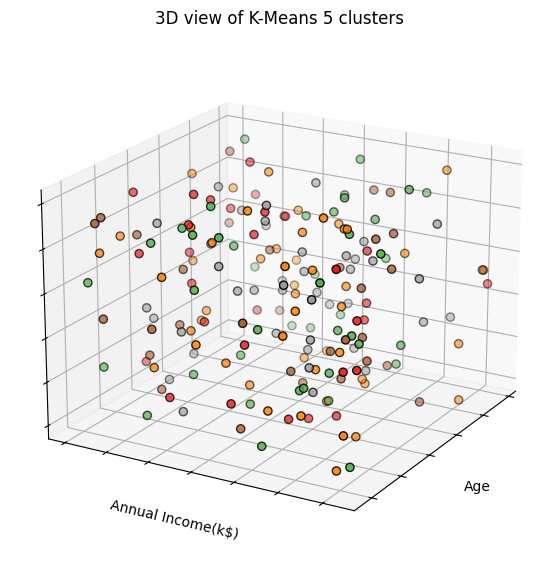

In [123]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Setting the elevation and azimuthal angle
ax.view_init(elev=20, azim=210)

# Creating the 3D scatter plot
sc = ax.scatter(KM5_clustered['Age'],
                KM5_clustered['Annual Income(k$)'],
                KM5_clustered['Spending Score (1-100)'],
                c=KM5_clustered['Cluster'],
                s=35, edgecolor='k', cmap=plt.cm.Set1)

# Setting tick labels to empty
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Setting labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()


In [130]:
import plotly as py
import plotly.graph_objs as go
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
    x = db[db['Cluster']==n]['Age'],
    y = db[db['Cluster']==n]['Spending Score (1-100)'],
    z = db[db['Cluster']==n]['Annual Income(k$)'],
    mode = 'markers',
    name = name,
    marker = dict(
        size = 5
    )
    )
    trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
    trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
    trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
    trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
    trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

    data = [trace0, trace1, trace2, trace3, trace4]
    layout = go.layout(
        title = 'Clusters by K-Means',
        scene = dict(
             xaxis = dict(title = 'Age'),
             yaxis = dict(title = 'Spending Score (1-100)'),
             zaxis = dict(title = 'Annual Income(k$)')
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    

In [131]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x=db[db['Cluster'] == n]['Age'],
        y=db[db['Cluster'] == n]['Spending Score (1-100)'],
        z=db[db['Cluster'] == n]['Annual Income(k$)'],
        mode='markers',
        name=name,
        marker=dict(size=5)
    )

# Creating trace objects
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

# Defining data and layout
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income(k$)')
    )
)

# Creating and plotting the figure
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [134]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Initialize notebook mode if using Jupyter notebook
py.init_notebook_mode(connected=True)

# Example KM5_clustered DataFrame for demonstration (replace with your actual DataFrame)
np.random.seed(0)
KM5_clustered = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income(k$)': np.random.randint(15, 140, size=200),
    'Spending Score (1-100)': np.random.randint(1, 100, size=200),
    'Cluster': np.random.randint(0, 5, size=200)
})

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x=db[db['Cluster'] == n]['Age'],
        y=db[db['Cluster'] == n]['Spending Score (1-100)'],
        z=db[db['Cluster'] == n]['Annual Income(k$)'],
        mode='markers',
        name=name,
        marker=dict(size=5)
    )

# Creating trace objects
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

# Defining data and layout
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income(k$)')
    )
)

# Creating and plotting the figure
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
